# 读取土壤湿度数据 -- 附件3 

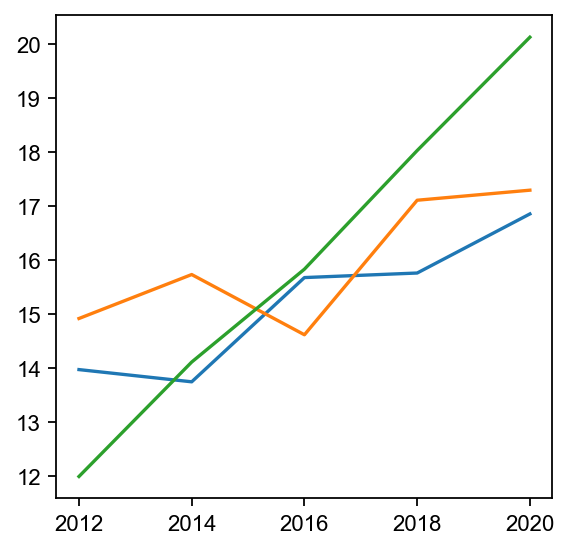

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['font.family'] = ['Arial Unicode MS']

data = pd.read_excel(io='./附件14/内蒙古自治区锡林郭勒盟典型草原不同放牧强度土壤碳氮监测数据集（2012年8月15日-2020年8月15日）.xlsx')

index = ['SOC土壤有机碳','SIC土壤无机碳','STC土壤全碳','全氮N','土壤C/N比']
#== 计算年平均值, 返回时间，化学成分，放牧强度
def Ave_year(plot):
    data2012 =  plot[plot['year'] == 2012]
    data2014 =  plot[plot['year'] == 2014]
    data2016 =  plot[plot['year'] == 2016]
    data2018 =  plot[plot['year'] == 2018]
    data2020 =  plot[plot['year'] == 2020]

    years = [data2012,data2014,data2016,data2018,data2020]
    t = [2012,2014,2016,2018,2020]
    intens = list(plot['放牧强度（intensity）'])[0]

    ave_data = {'SOC土壤有机碳':[],'SIC土壤无机碳':[],'STC土壤全碳':[],'全氮N':[],'土壤C/N比':[]}
    for year in years:
        for id in ave_data.keys():
            ave_data[id].append(sum(year[id])/len(year)) #平均
    return t,ave_data,intens


G17 = data[data['放牧小区（plot）']=='G17']
t,G17,intens = Ave_year(G17)

G19 = data[data['放牧小区（plot）']=='G19']
t,G19,intens = Ave_year(G19)


G21 = data[data['放牧小区（plot）']=='G21']
t,G21,intens = Ave_year(G21)

plt.figure(figsize=(4,4),dpi=160)
plt.plot(t,G17['SOC土壤有机碳'])
plt.plot(t,G19['SOC土壤有机碳'])
plt.plot(t,G21['SOC土壤有机碳'])


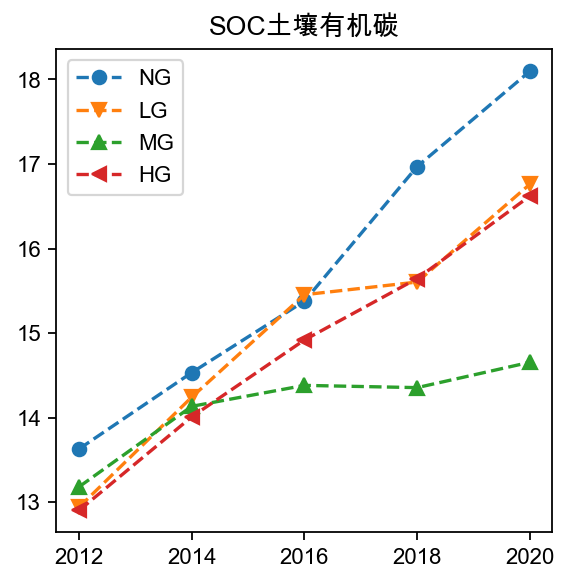

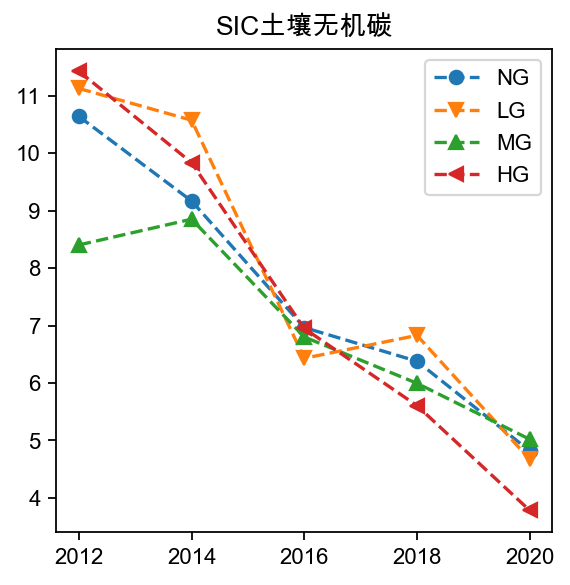

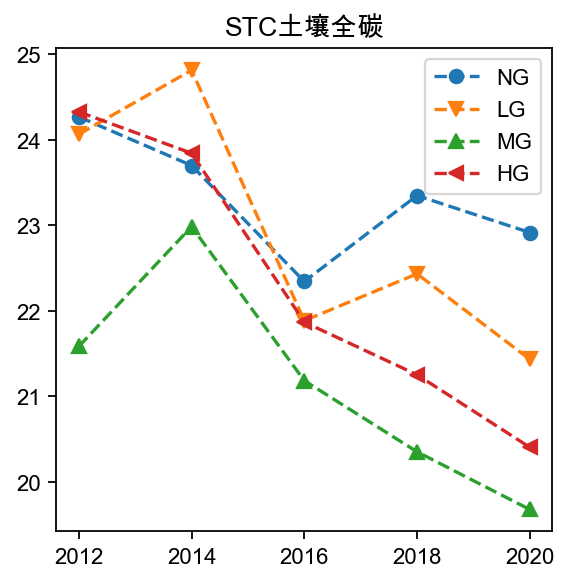

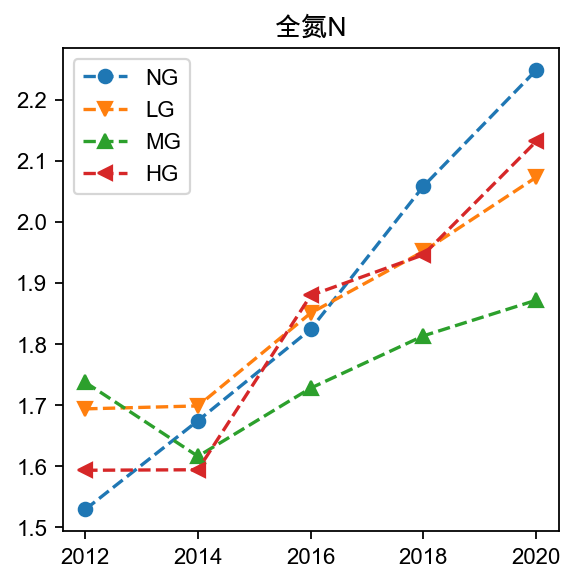

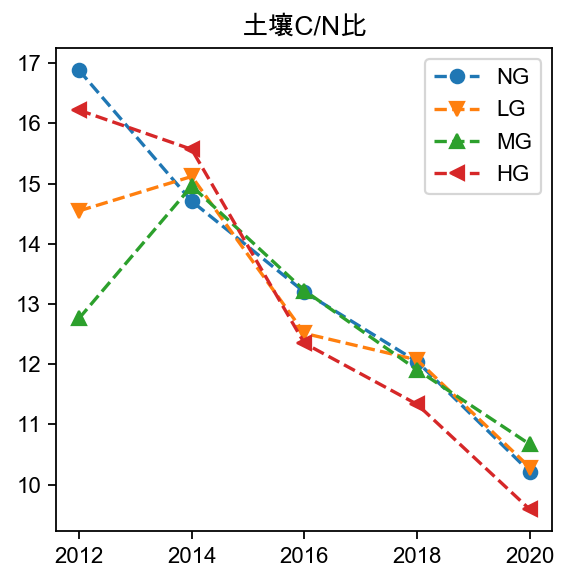

In [3]:
plot = ['G6','G8','G9','G11','G12','G13','G16','G17','G18','G19','G20','G21']

# 计算地区平均

def Ave_area():

    Intens_dat = {'NG':[],'LGI':[],'MGI':[],'HGI':[]}

    NG_data = {'SOC土壤有机碳':[],'SIC土壤无机碳':[],'STC土壤全碳':[],'全氮N':[], '土壤C/N比':[]}
    LG_data = {'SOC土壤有机碳':[],'SIC土壤无机碳':[],'STC土壤全碳':[],'全氮N':[], '土壤C/N比':[]}
    MG_data = {'SOC土壤有机碳':[],'SIC土壤无机碳':[],'STC土壤全碳':[],'全氮N':[], '土壤C/N比':[]}
    HG_data = {'SOC土壤有机碳':[],'SIC土壤无机碳':[],'STC土壤全碳':[],'全氮N':[], '土壤C/N比':[]}

    # 按 intense 分类
    for ins in Intens_dat.keys():
        for pl in plot:
            temp_data = data[data['放牧小区（plot）']==pl]
            t,ave,intens = Ave_year(temp_data)
            if intens == ins:
                Intens_dat[ins].append(ave.copy())

    # 求平均
    for key in NG_data.keys():
        NG_data[key] = (np.array(Intens_dat['NG'][0][key])+np.array(Intens_dat['NG'][1][key]) + np.array(Intens_dat['NG'][2][key]))/3
    for key in LG_data.keys():
        LG_data[key] = (np.array(Intens_dat['LGI'][0][key])+np.array(Intens_dat['LGI'][1][key]) + np.array(Intens_dat['LGI'][2][key]))/3
    for key in MG_data.keys():
        MG_data[key] = (np.array(Intens_dat['MGI'][0][key])+np.array(Intens_dat['MGI'][1][key]) + np.array(Intens_dat['MGI'][2][key]))/3
    for key in HG_data.keys():
        HG_data[key] = (np.array(Intens_dat['HGI'][0][key])+np.array(Intens_dat['HGI'][1][key]) + np.array(Intens_dat['HGI'][2][key]))/3

    return NG_data,LG_data,MG_data,HG_data


NG_data,LG_data,MG_data,HG_data = Ave_area()
for id in index:
    t = [2012,2014,2016,2018,2020]
    plt.figure(figsize=(4,4),dpi=160)
    plt.title(id)
    plt.plot(t,NG_data[id],label='NG', linestyle='dashed', marker='o')
    plt.plot(t,LG_data[id],label='LG', linestyle='dashed', marker='v')
    plt.plot(t,MG_data[id],label='MG', linestyle='dashed', marker='^')
    plt.plot(t,HG_data[id],label='HG', linestyle='dashed', marker='<')
    plt.legend()
    id = id.replace('/', 'to')
    plt.savefig(id+'.pdf')


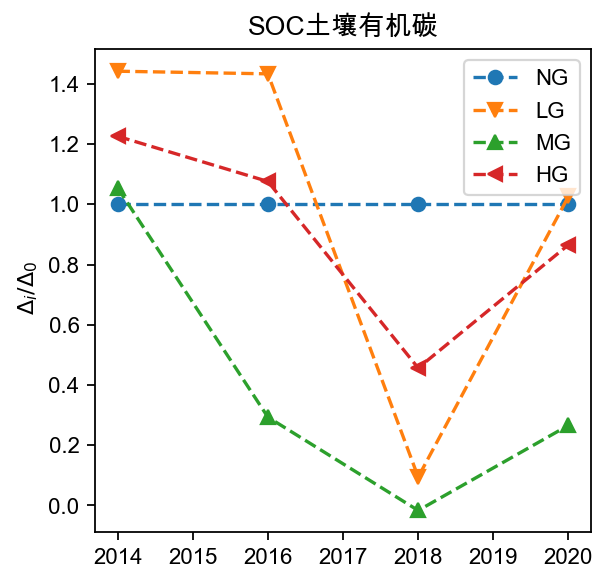

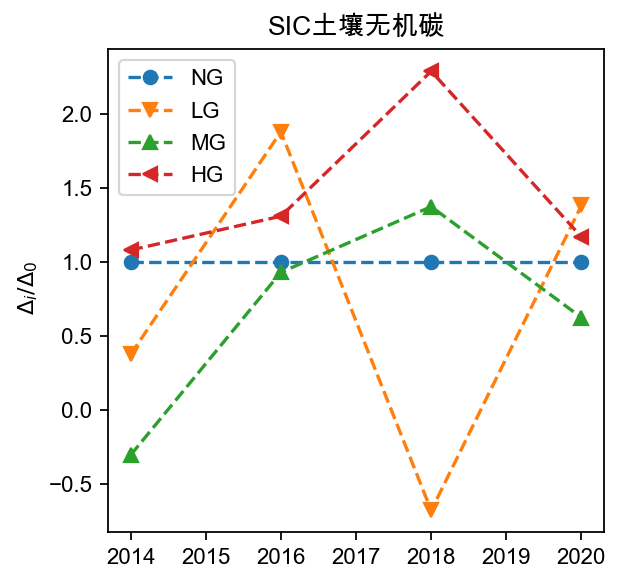

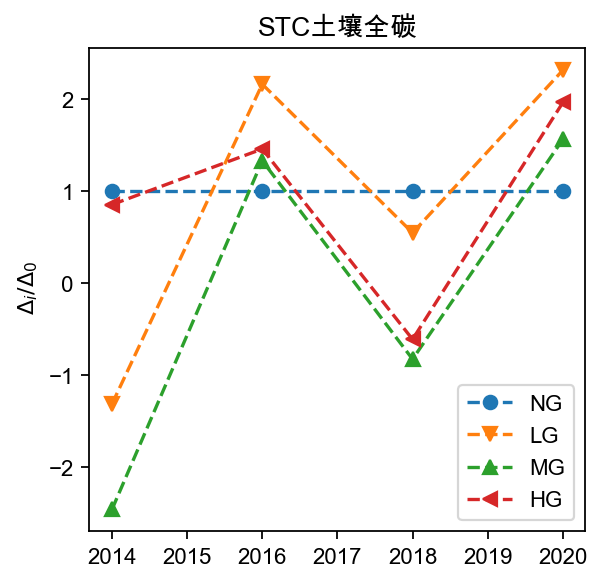

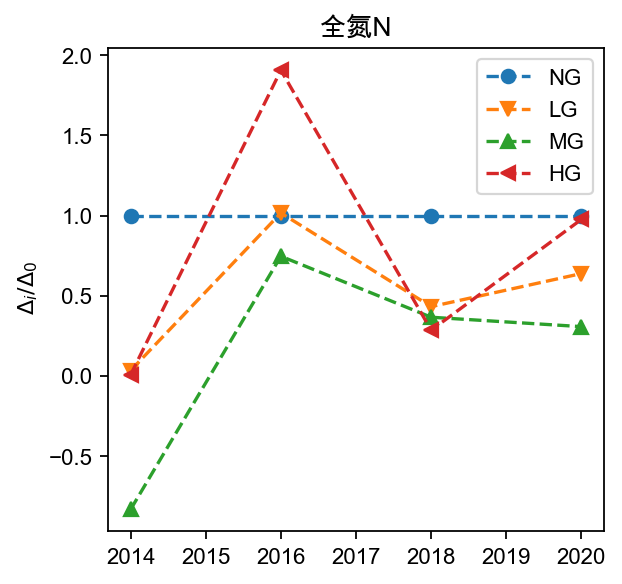

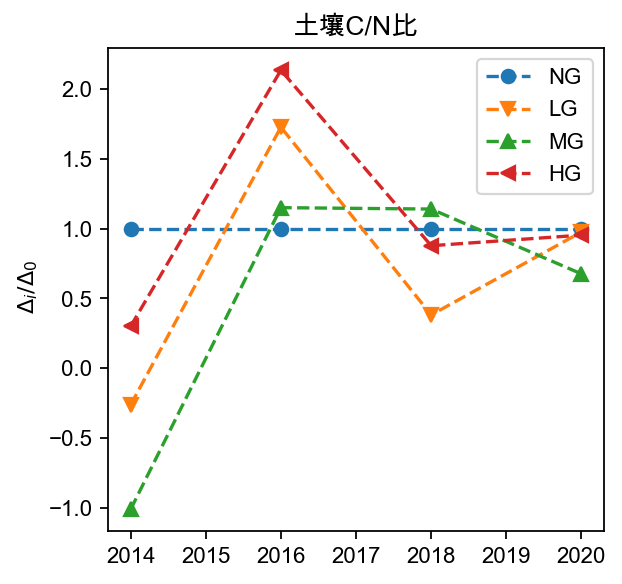

In [4]:

# 变化量
def Delta():
    NG_delta = {'SOC土壤有机碳':[],'SIC土壤无机碳':[],'STC土壤全碳':[],'全氮N':[], '土壤C/N比':[]}
    LG_delta = {'SOC土壤有机碳':[],'SIC土壤无机碳':[],'STC土壤全碳':[],'全氮N':[], '土壤C/N比':[]}
    MG_delta = {'SOC土壤有机碳':[],'SIC土壤无机碳':[],'STC土壤全碳':[],'全氮N':[], '土壤C/N比':[]}
    HG_delta = {'SOC土壤有机碳':[],'SIC土壤无机碳':[],'STC土壤全碳':[],'全氮N':[], '土壤C/N比':[]}

    for key in NG_delta.keys():
        NG_delta[key] = np.array(NG_data[key][1:])-np.array(NG_data[key][:-1])
    for key in LG_delta.keys():
        LG_delta[key] = np.array(LG_data[key][1:])-np.array(LG_data[key][:-1])
    for key in MG_delta.keys():
        MG_delta[key] = np.array(MG_data[key][1:])-np.array(MG_data[key][:-1])
    for key in HG_delta.keys():
        HG_delta[key] = np.array(HG_data[key][1:])-np.array(HG_data[key][:-1])


    return NG_delta,LG_delta,MG_delta,HG_delta

NG_delta,LG_delta,MG_delta,HG_delta = Delta()

for id in index:
    t = [2014,2016,2018,2020]
    plt.figure(figsize=(4,4),dpi=160)
    plt.title(id)
    plt.plot(t,NG_delta[id]/NG_delta[id],label='NG', linestyle='dashed', marker='o')
    plt.plot(t,LG_delta[id]/NG_delta[id],label='LG', linestyle='dashed', marker='v')
    plt.plot(t,MG_delta[id]/NG_delta[id],label='MG', linestyle='dashed', marker='^')
    plt.plot(t,HG_delta[id]/NG_delta[id],label='HG', linestyle='dashed', marker='<')
    plt.ylabel(r' $\Delta_i/\Delta_0$')
    plt.legend()
    id = id.replace('/', 'to')
    plt.savefig(id+'_变化.pdf')

[2014, 2016, 2018, 2020]


<Figure size 1280x1280 with 0 Axes>

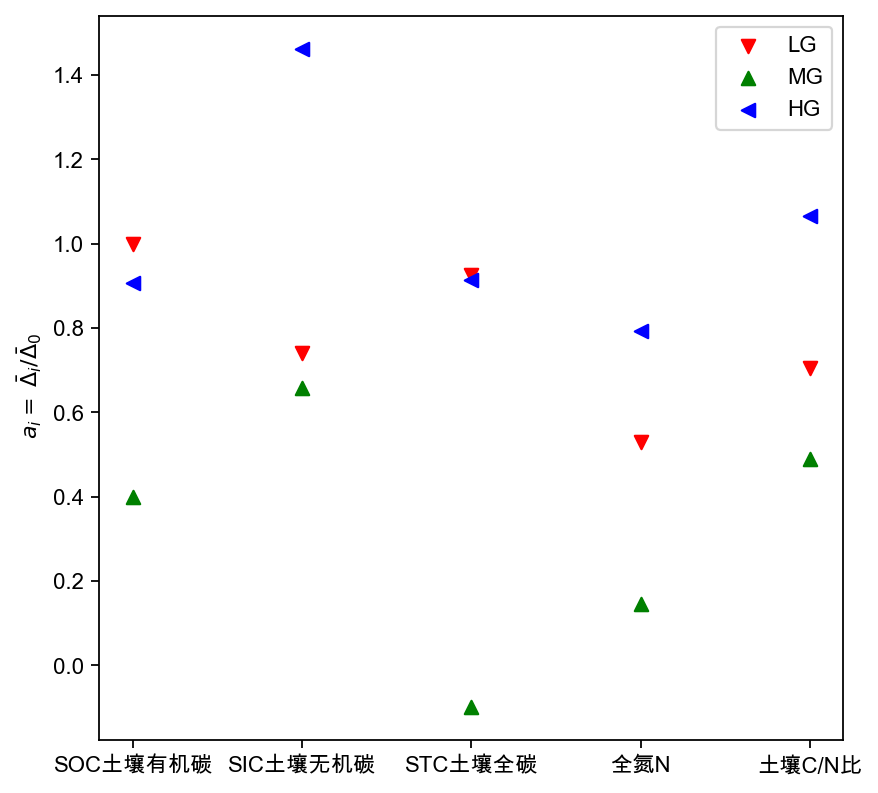

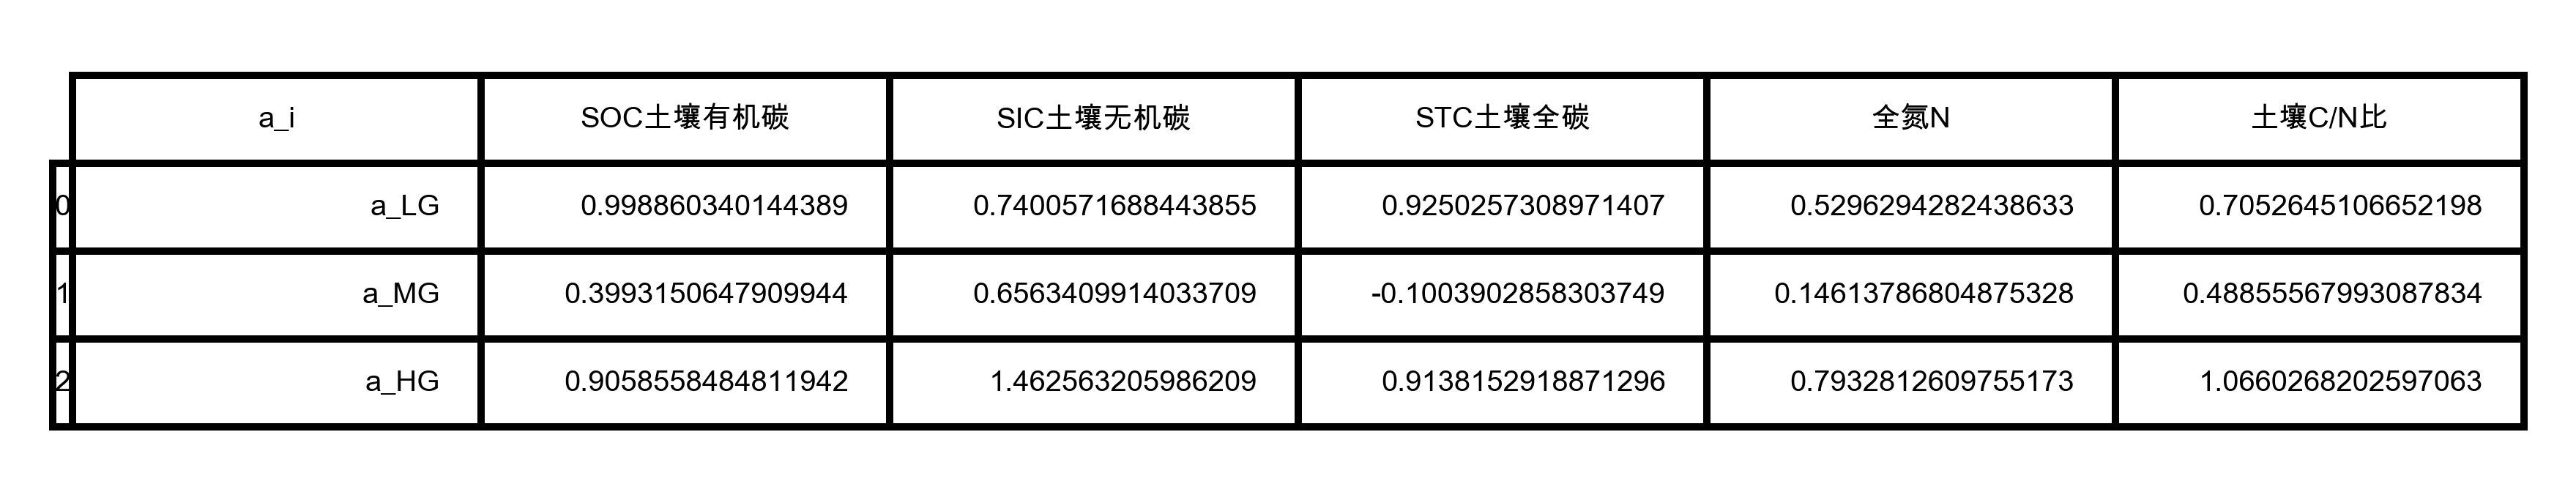

In [5]:
# 变化的比值 对于参照
from astropy.table import Table
from matplotlib import table
import dataframe_image as dfi


NG_fina,LG_fina,MG_fina,HG_fina = {},{},{},{}
for key in NG_delta.keys():
    NG_fina[key]  = np.mean(NG_delta[key]/NG_delta[key])
    LG_fina[key]  = np.mean(LG_delta[key]/NG_delta[key])
    MG_fina[key]  = np.mean(MG_delta[key]/NG_delta[key])
    HG_fina[key]  = np.mean(HG_delta[key]/NG_delta[key])


plt.figure(figsize=(8,8),dpi=160)

x =  {'SOC土壤有机碳':1,'SIC土壤无机碳':2,'STC土壤全碳':3,'全氮N':4, '土壤C/N比':5}
plt.figure(figsize=(6,6),dpi=160)
for key in NG_fina.keys():
    plt.scatter(x[key],LG_fina[key],label='LG',c='r',marker='v')
    plt.scatter(x[key],MG_fina[key],label='MG',c='g',marker='^')
    plt.scatter(x[key],HG_fina[key],label='HG',c='b',marker='<')

plt.xticks([1,2,3,4,5],NG_fina.keys())
plt.ylabel(r' $a_i=$ $\bar{\Delta}_i/\bar{\Delta}_0$    ')
plt.legend(['LG','MG','HG'])
plt.savefig('平均归一化变化量.pdf')
#plt.close()

ai = pd.DataFrame([LG_fina,MG_fina,HG_fina])
ai.insert(0, 'a_i', ['a_LG', 'a_MG', 'a_HG'])
print(t)

from pandas.plotting import  table
fig = plt.figure(figsize=(6, 1), dpi=720)#dpi表示清晰度
ax = fig.add_subplot(frame_on=False) 
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, ai, loc='center')  # 将df换成需要保存的dataframe即可
plt.savefig('ai.pdf')


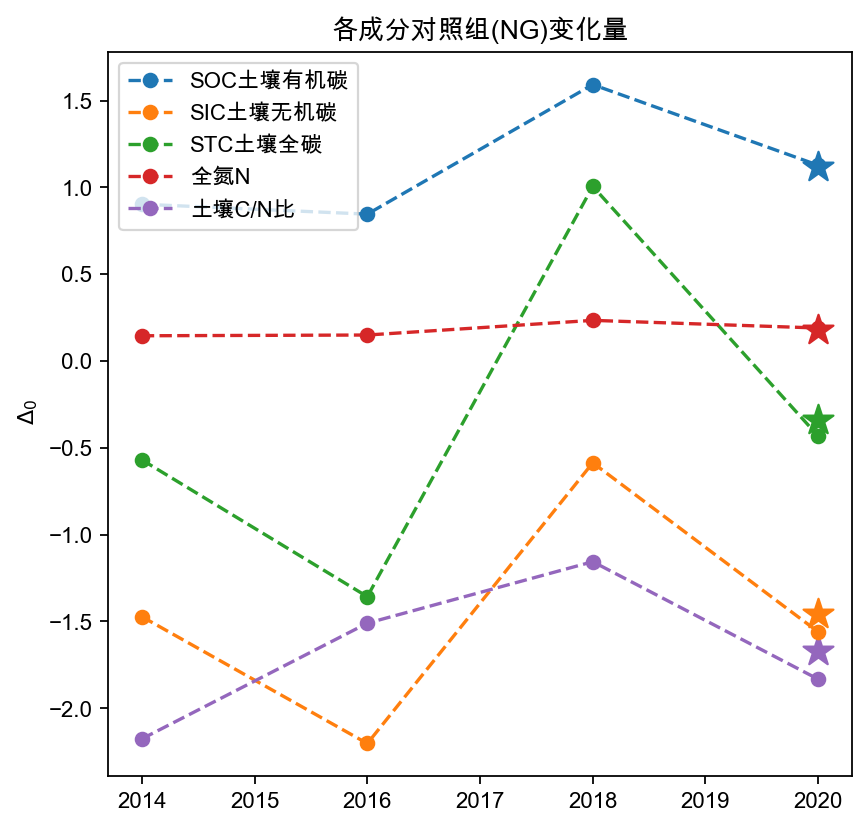

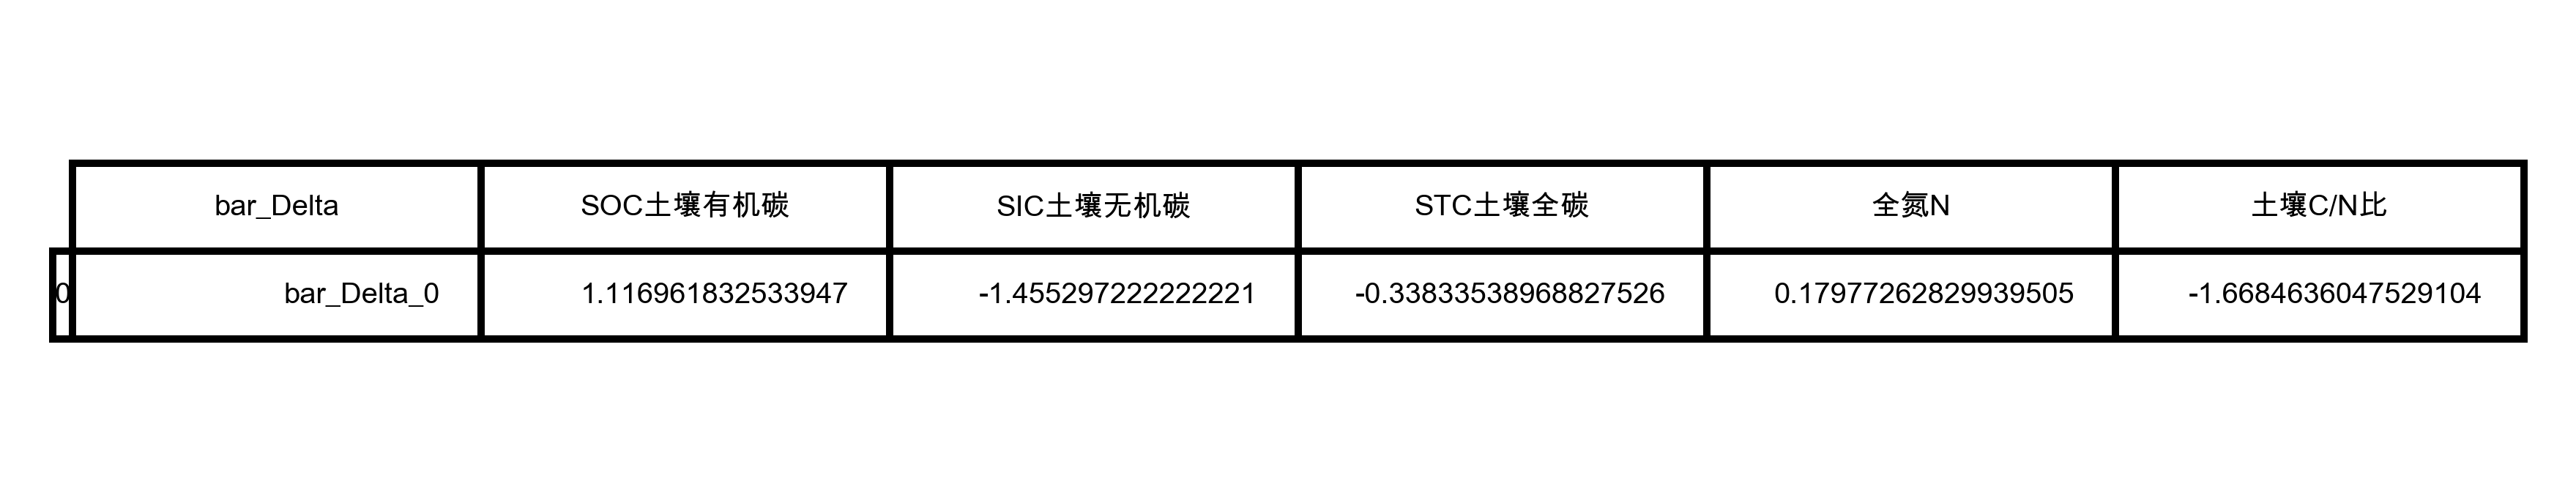

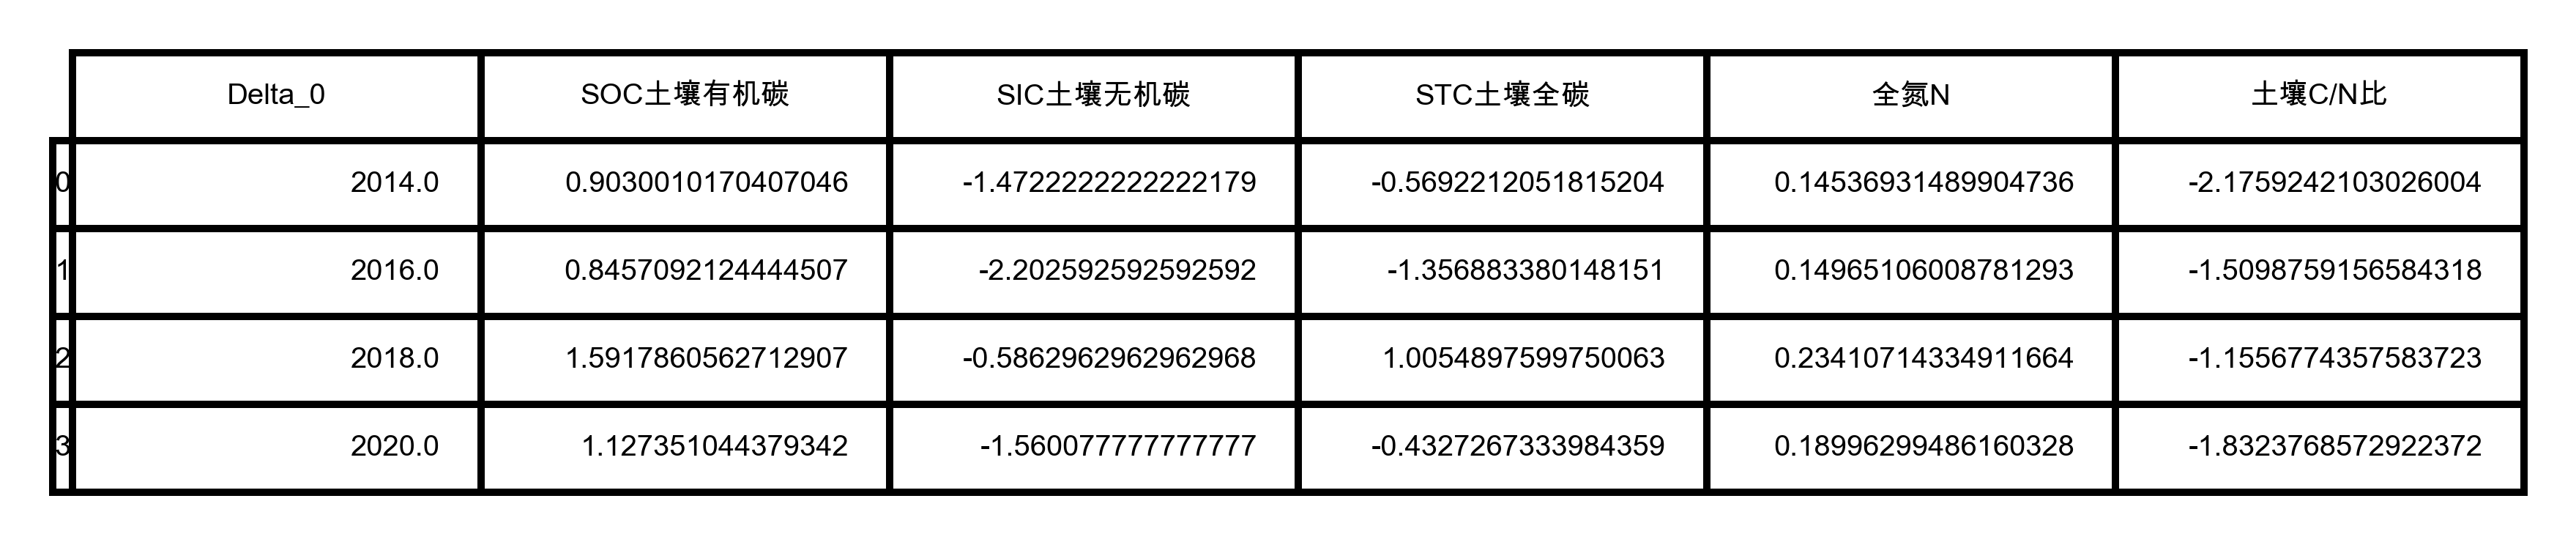

In [6]:
# 每个地区的对照组变化量
mean_delat0 = {'SOC土壤有机碳':0,'SIC土壤无机碳':0,'STC土壤全碳':0,'全氮N':0, '土壤C/N比':0}
plt.figure(figsize=(6,6),dpi=160)
plt.title('各成分对照组(NG)变化量')
for id in index:
    t = [2014,2016,2018,2020]
    plt.plot(t,NG_delta[id],label=id, linestyle='dashed', marker='o')
    plt.legend()
    mean_delat0[id] = np.mean(NG_delta[id])
    plt.scatter([2020],mean_delat0[id], marker='*',s=200)

plt.ylabel(r' $\Delta_0$')
plt.savefig('各成分对照组_变化.pdf')


bardelta0 = pd.DataFrame([mean_delat0])
bardelta0.insert(0, 'bar_Delta', ['bar_Delta_0'])

fig = plt.figure(figsize=(6, 1), dpi=720)#dpi表示清晰度
ax = fig.add_subplot(frame_on=False) 
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, bardelta0, loc='center')  # 将df换成需要保存的dataframe即可
plt.savefig('delta0.pdf')

deltai = pd.DataFrame(NG_delta)
deltai.insert(0, 'Delta_0',[2014,2016,2018,2020])

fig = plt.figure(figsize=(6, 1), dpi=720)#dpi表示清晰度
ax = fig.add_subplot(frame_on=False) 
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table(ax, deltai, loc='center')  # 将df换成需要保存的dataframe即可
plt.savefig('alldelta0.pdf')

In [7]:
indx = 'SOC土壤有机碳'

SOC_2022_NG = NG_data[indx][-1]+bardelta0[indx]
SOC_2022_LG = LG_data[indx][-1]+bardelta0[indx]*float(ai[ai['a_i']=='a_LG'][indx])
SOC_2022_MG = MG_data[indx][-1]+bardelta0[indx]*float(ai[ai['a_i']=='a_MG'][indx])
SOC_2022_HG = HG_data[indx][-1]+bardelta0[indx]*float(ai[ai['a_i']=='a_HG'][indx])

SOC_2022_NG,SOC_2022_LG,SOC_2022_MG,SOC_2022_HG

(0    19.213728
 Name: SOC土壤有机碳, dtype: float64,
 0    17.876172
 Name: SOC土壤有机碳, dtype: float64,
 0    15.100503
 Name: SOC土壤有机碳, dtype: float64,
 0    17.632306
 Name: SOC土壤有机碳, dtype: float64)

In [8]:
indx = '全氮N'

N_2022_NG = NG_data[indx][-1]+bardelta0[indx]
N_2022_LG = LG_data[indx][-1]+bardelta0[indx]*float(ai[ai['a_i']=='a_LG'][indx])
N_2022_MG = MG_data[indx][-1]+bardelta0[indx]*float(ai[ai['a_i']=='a_MG'][indx])
N_2022_HG = HG_data[indx][-1]+bardelta0[indx]*float(ai[ai['a_i']=='a_HG'][indx])

N_2022_NG,N_2022_LG,N_2022_MG,N_2022_HG

(0    2.427906
 Name: 全氮N, dtype: float64,
 0    2.16803
 Name: 全氮N, dtype: float64,
 0    1.897855
 Name: 全氮N, dtype: float64,
 0    2.274077
 Name: 全氮N, dtype: float64)